# Model Validation and Selection

Creating a model

In [2]:
import pandas as pd
import datetime
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night'  
df=pd.read_csv("C:/Users/nitin/Documents/NEU/SEM 2/ADS/Assignment 2/Appliances-energy-prediction-data-master/energydata_complete.csv")
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.weekday_name
df['time_hr_24']=df['date'].dt.hour
df['time_min']=df['date'].dt.minute
df['week_day_type']=df['day_of_week'].map(week_day_type)
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)  
df['time_slot']=df['time_hr_24'].map(time_slot)
df.drop(['date'],axis=1,inplace=True)
df=pd.get_dummies(df,prefix=['DOW','TS','WDT'],columns=['day_of_week','time_slot','week_day_type'])
print(df.shape)
df=df[(df['Appliances']-df['Appliances'].mean()).abs() <= 3*df['Appliances'].std()]
df=df[(df['lights']-df['lights'].mean()).abs() <= 3*df['lights'].std()]
df=df[(df['T1']-df['T1'].mean()).abs() <= 3*df['T1'].std()]
df=df[(df['T2']-df['T2'].mean()).abs() <= 3*df['T2'].std()]
df=df[(df['T3']-df['T3'].mean()).abs() <= 3*df['T3'].std()]
df=df[(df['T4']-df['T4'].mean()).abs() <= 3*df['T4'].std()]
df=df[(df['T5']-df['T5'].mean()).abs() <= 3*df['T5'].std()]
df=df[(df['T6']-df['T6'].mean()).abs() <= 3*df['T6'].std()]
df=df[(df['T7']-df['T7'].mean()).abs() <= 3*df['T7'].std()]
df=df[(df['T8']-df['T8'].mean()).abs() <= 3*df['T8'].std()]
df=df[(df['T9']-df['T9'].mean()).abs() <= 3*df['T9'].std()]
df=df[(df['T_out']-df['T_out'].mean()).abs() <= 3*df['T_out'].std()]
df=df[(df['RH_1']-df['RH_1'].mean()).abs() <= 3*df['RH_1'].std()]
df=df[(df['RH_2']-df['RH_2'].mean()).abs() <= 3*df['RH_2'].std()]
df=df[(df['RH_3']-df['RH_3'].mean()).abs() <= 3*df['RH_3'].std()]
df=df[(df['RH_4']-df['RH_4'].mean()).abs() <= 3*df['RH_4'].std()]
df=df[(df['RH_5']-df['RH_5'].mean()).abs() <= 3*df['RH_5'].std()]
df=df[(df['RH_6']-df['RH_6'].mean()).abs() <= 3*df['RH_6'].std()]
df=df[(df['RH_7']-df['RH_7'].mean()).abs() <= 3*df['RH_7'].std()]
df=df[(df['RH_8']-df['RH_8'].mean()).abs() <= 3*df['RH_8'].std()]
df=df[(df['RH_9']-df['RH_9'].mean()).abs() <= 3*df['RH_9'].std()]
df=df[(df['RH_out']-df['RH_out'].mean()).abs() <= 3*df['RH_out'].std()]
df=df[(df['Press_mm_hg']-df['Press_mm_hg'].mean()).abs() <= 3*df['Press_mm_hg'].std()]
df=df[(df['Windspeed']-df['Windspeed'].mean()).abs() <= 3*df['Windspeed'].std()]
df=df[(df['Visibility']-df['Visibility'].mean()).abs() <= 3*df['Visibility'].std()]
df=df[(df['Tdewpoint']-df['Tdewpoint'].mean()).abs() <= 3*df['Tdewpoint'].std()]
df=df[(df['rv1']-df['rv1'].mean()).abs() <= 3*df['rv1'].std()]
df=df[(df['rv2']-df['rv2'].mean()).abs() <= 3*df['rv2'].std()]
print(df.shape)
energy = df

(19735, 46)
(17118, 46)


Now the model is ready, let's find ut how the data is distributed.

In [3]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday,TS_afternoon,TS_evening,TS_morning,TS_night,WDT_weekdays,WDT_weekends
27,100,20,21.356667,45.826667,20.666667,45.163333,20.390000,46.090000,19.390000,47.500000,...,0,0,0,0,0,1,0,0,1,0
28,100,20,21.390000,45.690000,20.700000,45.060000,20.390000,46.090000,19.426667,47.993333,...,0,0,0,0,0,1,0,0,1,0
29,100,20,21.500000,45.333333,20.700000,44.933333,20.390000,46.060000,19.566667,48.466667,...,0,0,0,0,0,1,0,0,1,0
30,110,20,21.500000,45.126667,20.790000,44.633333,20.390000,46.000000,19.666667,48.093333,...,0,0,0,0,0,0,0,1,1,0
31,400,20,21.533333,44.966667,20.790000,44.360000,20.426667,45.933333,19.600000,47.500000,...,0,0,0,0,0,0,0,1,1,0


Now when we now how the initial data is distributed, let's find out whethere it has any null values. Also, we have to find what are the nature of the data in our dataset. 

In [40]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 27 to 19697
Data columns (total 46 columns):
Appliances       17118 non-null int64
lights           17118 non-null int64
T1               17118 non-null float64
RH_1             17118 non-null float64
T2               17118 non-null float64
RH_2             17118 non-null float64
T3               17118 non-null float64
RH_3             17118 non-null float64
T4               17118 non-null float64
RH_4             17118 non-null float64
T5               17118 non-null float64
RH_5             17118 non-null float64
T6               17118 non-null float64
RH_6             17118 non-null float64
T7               17118 non-null float64
RH_7             17118 non-null float64
T8               17118 non-null float64
RH_8             17118 non-null float64
T9               17118 non-null float64
RH_9             17118 non-null float64
T_out            17118 non-null float64
Press_mm_hg      17118 non-null float64
RH_out        

Detecting overfitting.

In [4]:
# Overfitting detecting
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

Making the model to help us better analyze the data better.

In [5]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
x_train=df_train.iloc[:,1:]
y_train=df_train['Appliances']
scaler.fit(x_train)
X_train=scaler.transform(x_train)
x_test=df_test.iloc[:,1:]
y_test=df_test['Appliances']
X_test=scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Regularization

In [44]:
# Set random_state as a const to make sure the same split will be generated every time you run the code.
#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# Containers for note down the MSE
train_mse_list = []
test_mse_list = []
degree_of_polynomial = []

In [ ]:
# MSE of quartic expression will be very large compared with the lower degree, so let's just end at 3.
for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    # Transfer the X to a polynomial form by using fit_transform
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    lm = linear_model.LinearRegression()
    lm.fit(X_train_, y_train)
    train_pred = lm.predict(X_train_)
    train_mse_list.append(mean_squared_error(y_train, train_pred))
    test_pred = lm.predict(X_test_)
    test_mse_list.append(mean_squared_error(y_test, test_pred))
    degree_of_polynomial.append(i)
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred))
    print("MAE  :",mean_absolute_error(y_train,train_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred))
    print("MAE  :",mean_absolute_error(y_test,test_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Regularization')
plt.plot(degree_of_polynomial, train_mse_list, '-b', degree_of_polynomial, test_mse_list, '-g')
plt.show()


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053819
RMSE : 66.9702239423
MAPE : 59.4387144291

For Testing Data : 
R2   : -0.000637473590203
MAE  : 41.2046509536
RMSE : 64.5491115647
MAPE : 59.7365433658

Degree :  1
For Training Data : 
R2   : 0.246639428853
MAE  : 34.8227841525
RMSE : 58.1277074154
MAPE : 45.8357817903

For Testing Data : 
R2   : 0.229821388582
MAE  : 34.4150053509
RMSE : 56.6301372843
MAPE : 46.8820948184

Degree :  2
For Training Data : 
R2   : 0.480242798081
MAE  : 29.4357390578
RMSE : 48.2816395051
MAPE : 38.7336337978

For Testing Data : 
R2   : 0.389104562213
MAE  : 31.0325142453
RMSE : 50.435383622
MAPE : 41.6045308811


Performing L1 (lasso)

Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053819
RMSE : 66.9702239423
MAPE : 59.4387144291

For Training Data : 
R2   : -0.000637473590203
MAE  : 41.2046509536
RMSE : 64.5491115647
MAPE : 59.7365433658


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Degree :  1
For Training Data : 
R2   : 0.246677503442
MAE  : 34.8180986593
RMSE : 58.1262385195
MAPE : 45.8224182033

For Training Data : 
R2   : 0.229991111017
MAE  : 34.4061858426
RMSE : 56.6238972159
MAPE : 46.865479395
Degree :  2
For Training Data : 
R2   : 0.467498638808
MAE  : 29.7407090018
RMSE : 48.8699744883
MAPE : 39.0205854165

For Training Data : 
R2   : 0.38410916237
MAE  : 30.9542502799
RMSE : 50.6411733018
MAPE : 41.2781861233
Degree :  3
For Training Data : 
R2   : 0.825406331872
MAE  : 17.5567569914
RMSE : 27.9831110446
MAPE : 25.0716509401

For Training Data : 
R2   : 0.179506463709
MAE  : 35.436072723
RMSE : 58.4506667656
MAPE : 48.325502479


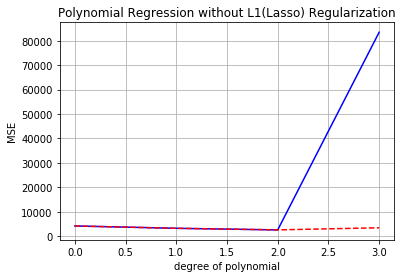

In [27]:
from sklearn.linear_model import Lasso

# Randomly pick a alpha value for regularization
l1reg = Lasso(alpha=0.000003, normalize=True)

l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l1reg.fit(X_train_, y_train)
    train_pred_l1 = l1reg.predict(X_train_)
    test_pred_l1 = l1reg.predict(X_test_)
    l1reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l1))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_l1))
    print("MAE  :",mean_absolute_error(y_train,train_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred_l1))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_l1))
    print("MAE  :",mean_absolute_error(y_test,test_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred_l1))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l1reg_test_mse_list, '--r')
plt.show()

Performing L2 (Ridge)

Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053819
RMSE : 66.9702239423
MAPE : 59.4387144291

For Training Data : 
R2   : -0.000637473590203
MAE  : 41.2046509536
RMSE : 64.5491115647
MAPE : 59.7365433658
Degree :  1
For Training Data : 
R2   : 0.246677536746
MAE  : 34.8175390371
RMSE : 58.1262372346
MAPE : 45.821195985

For Training Data : 
R2   : 0.22998723046
MAE  : 34.4059545541
RMSE : 56.6240398973
MAPE : 46.865003745
Degree :  2
For Training Data : 
R2   : 0.479238222911
MAE  : 29.3900967769
RMSE : 48.3282758215
MAPE : 38.610016305

For Training Data : 
R2   : 0.390776643341
MAE  : 30.8764649246
RMSE : 50.3663130141
MAPE : 41.2830234927
Degree :  3
For Training Data : 
R2   : 0.909496717829
MAE  : 12.9629587183
RMSE : 20.1471637349
MAPE : 19.4335036257

For Training Data : 
R2   : -0.395245177931
MAE  : 42.5912806614
RMSE : 76.2214405941
MAPE : 56.9101945902


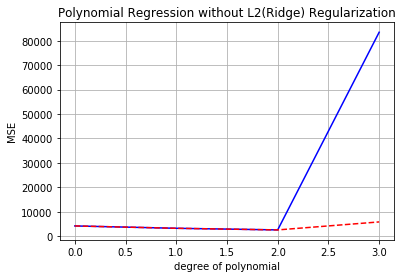

In [28]:
from sklearn.linear_model import Ridge

l2reg = Ridge(alpha=0.00003, normalize=True)

l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l2reg.fit(X_train_, y_train)
    train_pred_l2 = l2reg.predict(X_train_)
    test_pred_l2 = l2reg.predict(X_test_)
    l2reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l2))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_l2))
    print("MAE  :",mean_absolute_error(y_train,train_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred_l2))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_l2))
    print("MAE  :",mean_absolute_error(y_test,test_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred_l2))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l2reg_test_mse_list, '--r')
plt.show()

# Red dash line is the testing error after L2 regularization

Performing ElasticNet


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053819
RMSE : 66.9702239423
MAPE : 59.4387144291

For Testing Data : 
R2   : -0.000637473590203
MAE  : 41.2046509536
RMSE : 64.5491115647
MAPE : 59.7365433658

Degree :  1
For Training Data : 
R2   : 0.211599628299
MAE  : 34.3747214199
RMSE : 59.4641426122
MAPE : 44.9158138318

For Testing Data : 
R2   : 0.204632181183
MAE  : 33.6914764038
RMSE : 57.5487500385
MAPE : 45.4987762104


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  2
For Training Data : 
R2   : 0.367411707774
MAE  : 31.027699358
RMSE : 53.2650484146
MAPE : 39.8030536222

For Testing Data : 
R2   : 0.324727273552
MAE  : 31.2353914984
RMSE : 53.0263204829
MAPE : 41.0846022383

Degree :  3
For Training Data : 
R2   : 0.604177771407
MAE  : 24.181216425
RMSE : 42.1339175448
MAPE : 31.024321035

For Testing Data : 
R2   : 0.410848226902
MAE  : 29.0349597552
RMSE : 49.5296754414
MAPE : 37.6431268006


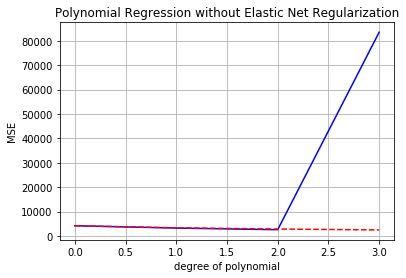

In [29]:
from sklearn.linear_model import ElasticNet

enreg = ElasticNet(alpha=0.00003, normalize=True)

enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    enreg.fit(X_train_, y_train)
    train_pred_en = enreg.predict(X_train_)
    test_pred_en = enreg.predict(X_test_)
    enreg_test_mse_list.append(mean_squared_error(y_test, test_pred_en))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_en))
    print("MAE  :",mean_absolute_error(y_train,train_pred_en))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_en)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred_en))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_en))
    print("MAE  :",mean_absolute_error(y_test,test_pred_en))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_en)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred_en))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Elastic Net Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, enreg_test_mse_list, '--r')
plt.show()
# Red dash line is the testing error after Elastic Net regularization

trying to find the best value for alpha.

The generalization score of linear regression model is 0.240693
The generalization score of quadratic regression model is 0.379625


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The calculated optimal alpha is 0.000050 
The max generalization score of L1 regularized polynomial regression model is 0.377953 +- 0.000245


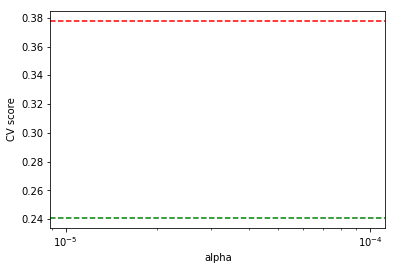

In [30]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
l1reg = Lasso(normalize=True)
for alpha in alphas:
    l1reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l1reg, X_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of L1 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.

Using the derived alpha to perfrom regularization. 


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053819
RMSE : 66.9702239423
MAPE : 59.4387144291

For Testing Data : 
R2   : -0.000637473590203
MAE  : 41.2046509536
RMSE : 64.5491115647
MAPE : 59.7365433658

Degree :  1
For Training Data : 
R2   : 0.246673695248
MAE  : 34.8068937885
RMSE : 58.1263854391
MAPE : 45.8034397158

For Testing Data : 
R2   : 0.230059025338
MAE  : 34.3940895348
RMSE : 56.621400064
MAPE : 46.8456604718


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  2
For Training Data : 
R2   : 0.467201883643
MAE  : 29.5947105407
RMSE : 48.8835898501
MAPE : 38.6989185829

For Testing Data : 
R2   : 0.38632157828
MAE  : 30.7415920412
RMSE : 50.5501343309
MAPE : 40.8988494302

Degree :  3
For Training Data : 
R2   : 0.806084321761
MAE  : 17.9451618115
RMSE : 29.4909126612
MAPE : 25.0377789096

For Testing Data : 
R2   : 0.294143622011
MAE  : 32.846042621
RMSE : 54.2138262097
MAPE : 44.5571280082
MSE of linear regression model is 3206.972449
MSE of quadratic regression model is 2543.727921
MSE of optimal L1 regularized quadratic regression model is 2555.316081


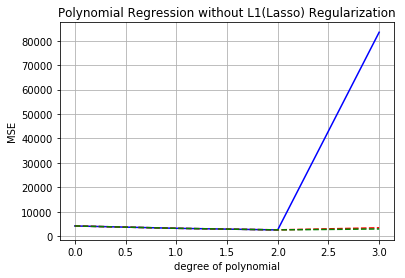

In [32]:
# Set the alpha as the optimal value we got from the last step

optimal_l1reg = Lasso(alpha=0.000050, normalize=True)

opt_l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_l1reg.fit(X_train_, y_train)
    train_opt_pred_l1 = optimal_l1reg.predict(X_train_)
    test_opt_pred_l1 = optimal_l1reg.predict(X_test_)
    opt_l1reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l1))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_l1))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_opt_pred_l1))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_l1))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_opt_pred_l1))

print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L1 regularized quadratic regression model is %f' % opt_l1reg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  l1reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l1reg_test_mse_list, '--g')
plt.show()

# Green dash line is the testing error after L1 regularization with optimal alpha. We can see that it is lower
# than the red dash line which using alpha=0.005.

The generalization score of linear regression model is 0.240693
The generalization score of quadratic regression model is 0.379625
The calculated optimal alpha is 0.000050 
The max generalization score of L2 regularized polynomial regression model is 0.381709 +- 0.000265


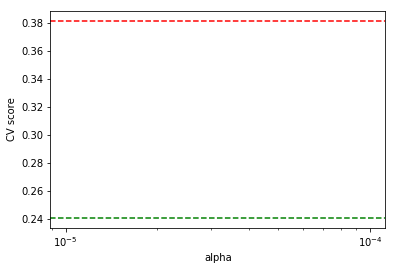

In [34]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
l2reg = Ridge(normalize=True)
for alpha in alphas:
    l2reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l2reg, X_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of L2 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053819
RMSE : 66.9702239423
MAPE : 59.4387144291

For Testing Data : 
R2   : -0.000637473590203
MAE  : 41.2046509536
RMSE : 64.5491115647
MAPE : 59.7365433658

Degree :  1
For Training Data : 
R2   : 0.246677462231
MAE  : 34.816770949
RMSE : 58.1262401094
MAPE : 45.8198681235

For Testing Data : 
R2   : 0.229995360808
MAE  : 34.4050827503
RMSE : 56.6237409579
MAPE : 46.8634899155

Degree :  2
For Training Data : 
R2   : 0.478714097056
MAE  : 29.3801697047
RMSE : 48.3525899415
MAPE : 38.5706439882

For Testing Data : 
R2   : 0.391044941092
MAE  : 30.8329974929
RMSE : 50.3552213049
MAPE : 41.1915245581

Degree :  3
For Training Data : 
R2   : 0.900005978772
MAE  : 13.5063464702
RMSE : 21.17721121
MAPE : 20.0270742994

For Testing Data : 
R2   : -0.223930283413
MAE  : 40.4821040773
RMSE : 71.3888240131
MAPE : 54.2754240898
MSE of linear regression model is 3206.972449
MSE of quadratic regression model is 2543.727921
MSE of optimal

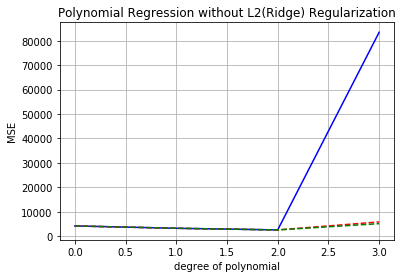

In [35]:
# Set the alpha as the optimal value we got from the last step

optimal_l2reg = Ridge(alpha=0.000050, normalize=True)

opt_l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_l2reg.fit(X_train_, y_train)
    train_opt_pred_l2 = optimal_l2reg.predict(X_train_)
    test_opt_pred_l2 = optimal_l2reg.predict(X_test_)
    opt_l2reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l2))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_l2))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_opt_pred_l2))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_l2))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_opt_pred_l2))

print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L2 regularized quadratic regression model is %f' % opt_l2reg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  l2reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l2reg_test_mse_list, '--g')
plt.show()

The generalization score of linear regression model is 0.240693
The generalization score of quadratic regression model is 0.379625


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The calculated optimal alpha is 0.000050 
The max generalization score of ElasticNet regularized polynomial regression model is 0.317952 +- 0.000142


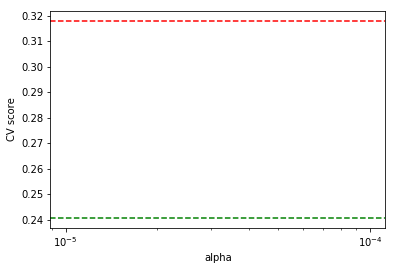

In [36]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
enreg = ElasticNet(normalize=True)
for alpha in alphas:
    enreg.alpha = alpha
    this_scores = model_selection.cross_val_score(enreg, X_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of ElasticNet regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()
# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053819
RMSE : 66.9702239423
MAPE : 59.4387144291

For Testing Data : 
R2   : -0.000637473590203
MAE  : 41.2046509536
RMSE : 64.5491115647
MAPE : 59.7365433658

Degree :  1
For Training Data : 
R2   : 0.200805633914
MAE  : 34.375626963
RMSE : 59.8698207699
MAPE : 44.9779819628

For Testing Data : 
R2   : 0.19491500806
MAE  : 33.6369025087
RMSE : 57.8992253211
MAPE : 45.475450694


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  2
For Training Data : 
R2   : 0.348401609497
MAE  : 31.3777833313
RMSE : 54.0594661507
MAPE : 40.2598270767

For Testing Data : 
R2   : 0.310679771093
MAE  : 31.44356314
RMSE : 53.5750270996
MAPE : 41.3894287886

Degree :  3
For Training Data : 
R2   : 0.575724579219
MAE  : 24.9741193338
RMSE : 43.6220114694
MAPE : 31.886894461

For Testing Data : 
R2   : 0.404613016404
MAE  : 29.0754133768
RMSE : 49.7910810349
MAPE : 37.6368151714
MSE of linear regression model is 3206.972449
MSE of quadratic regression model is 2543.727921
MSE of optimal L2 regularized quadratic regression model is 2870.283529


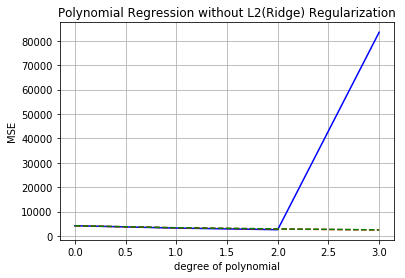

In [37]:
optimal_enreg = ElasticNet(alpha=0.000050, normalize=True)

opt_enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_enreg.fit(X_train_, y_train)
    train_opt_pred_enreg = optimal_enreg.predict(X_train_)
    test_opt_pred_enreg = optimal_enreg.predict(X_test_)
    opt_enreg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_enreg))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_enreg))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_enreg))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_enreg)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_opt_pred_enreg))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_enreg))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_enreg))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_enreg)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_opt_pred_enreg))

print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L2 regularized quadratic regression model is %f' % opt_enreg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  enreg_test_mse_list, '--r',
         degree_of_polynomial, opt_enreg_test_mse_list, '--g')
plt.show()

# Cross Validation Technique

Testing for training dataset.

In [10]:
#df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
#x_train=df_train.iloc[:,1:]
#y_train=df_train['Appliances']
#scaler.fit(x_train)
#X_train=scaler.transform(x_train)
#x_test=df_test.iloc[:,1:]
#y_test=df_test['Appliances']
#X_test=scaler.transform(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracy_train = cross_val_score(estimator = LinearRegression() , X = X_train, y = y_train , cv = 10)

accuracy_train

array([ 0.23969467,  0.20955204,  0.27998882,  0.24029214,  0.24212669,
        0.21562057,  0.23401395,  0.24889118,  0.24022395,  0.26513223])

Mean accuracy.

In [11]:
accuracy_train.mean()

0.24155362389574181

Performing on testing dataset.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracy_test = cross_val_score(estimator = LinearRegression() , X = X_test, y = y_test , cv = 10)

accuracy_test

array([ 0.15171928,  0.20987585,  0.25722266,  0.20690283,  0.26778345,
        0.25304469,  0.28914837,  0.22071825,  0.18029891,  0.23000607])

Mean accuracy.

In [13]:
accuracy_test.mean()

0.22667203553439866